In [1]:
import spacy

# Load the 'en_core_web_md' model
word2vec = spacy.load('en_core_web_md')

In [2]:
# Word football
football = word2vec('football')
print(football.vector) # Vector of shape (300,)
print("Vector dimensions: {}".format(len(football.vector)))

[-1.8633e+00  4.2826e+00 -7.1575e-01  1.2353e+00  5.4601e+00  6.0244e+00
 -2.2204e+00  1.7759e+00  2.5588e+00 -2.0682e+00  4.4509e+00 -2.2267e+00
 -1.6666e+00 -1.0174e+00 -5.0303e+00  2.4880e+00  4.0848e-01  1.0369e+00
  3.4916e+00  3.7098e+00  2.2451e+00 -1.1685e+00 -3.2297e-01 -1.6925e+00
  8.3621e-01 -2.6654e-02 -3.7525e+00 -4.9996e-01  5.6734e+00  4.7680e+00
 -3.7574e+00 -1.4604e-01  5.3413e-01 -5.5588e+00  1.1134e+00  3.0370e+00
  6.7387e-01  4.8416e+00 -6.9886e+00 -2.4840e+00  9.1392e-01  3.8642e+00
  4.7409e+00 -9.1215e-01 -4.7876e-01 -4.5356e-01 -2.5983e+00 -2.6529e+00
 -6.0445e+00  6.5456e-01  4.5724e+00  4.7130e+00 -8.7298e-01 -2.4036e+00
  1.3543e+00 -2.4419e-02 -1.6746e+00  5.0430e+00 -7.3322e-01  3.2873e+00
 -8.2850e-01 -1.7169e+00 -1.2998e+00 -5.5582e-01  2.4973e+00  8.2000e-01
 -5.0912e+00  2.9508e+00 -2.6805e+00  1.6948e+00  2.6353e-01 -5.5573e-01
 -2.5534e+00 -7.1705e-01  2.5999e+00 -3.8282e-01 -3.7611e+00  7.0098e+00
 -2.3766e+00 -6.6381e-01 -2.1161e+00 -1.0708e+00 -4

In [3]:
# Word frankfruteria
frankfurteria = word2vec('frankfurteria')
print(frankfurteria.vector) # As you can see the word is not in the vocabulary and the vector is 0
print("Vector dimensions: {}".format(len(frankfurteria.vector)))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Vector dimensions: 300


In [4]:
# Check if the word is in the vocabulary
print(word2vec('flowers').has_vector)

True


In [5]:
# Creating a sentence with the word football
sentence = "I love football"
sentence = word2vec(sentence)
print("Vector dimensions: {}".format(len(sentence.vector)))
# The sentence vector is the average of the word vectors

Vector dimensions: 300


In [6]:
sentence1 = "I visited Scotland"
sentence2 = "I went to Edinburgh"
sentence1 = word2vec(sentence1)
sentence2 = word2vec(sentence2)

# Compute the similarity between the two sentences
similarity = sentence1.similarity(sentence2)
print(similarity)

0.753202935804182


In [7]:
# Two similar sentences different from the previous ones
sentence1 = "The cat is on the table"
sentence2 = "The cat is on the mat"
sentence1 = word2vec(sentence1)
sentence2 = word2vec(sentence2)

# Compute the similarity between the two sentences
similarity = sentence1.similarity(sentence2)
print(similarity)

0.9707668964541895


In [8]:
# Two non similar sentences
sentence1 = "The cat is on the table"
sentence2 = "There was a dog in the garden"
sentence1 = word2vec(sentence1)
sentence2 = word2vec(sentence2)

# Compute the similarity between the two sentences
similarity = sentence1.similarity(sentence2)
print(similarity)

0.7115678373296573


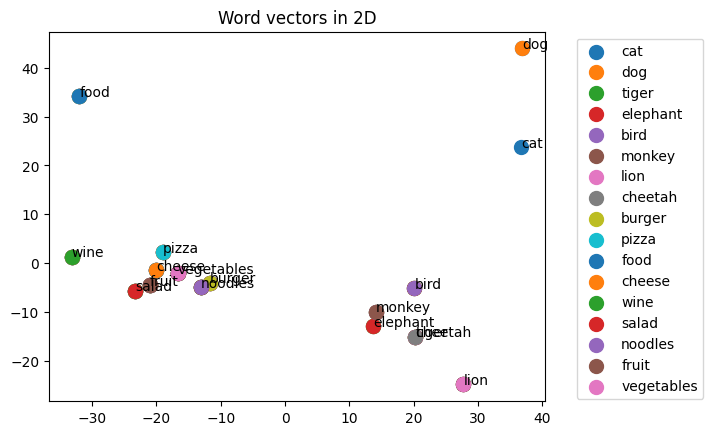

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ['cat', 'dog', 'tiger', 'elephant', 'bird', 'monkey', 'lion', 'cheetah', 'burger', 'pizza', 'food', 'cheese', 'wine', 'salad', 'noodles', 'fruit', 'vegetables']

word_vectors = [word2vec(word).vector for word in words]

pca = PCA(n_components=2)
word_vec_2d = pca.fit_transform(word_vectors)

# plot every word with different color and a leyend next to the plot with the word of each point
for i, word in enumerate(words):
    plt.scatter(word_vec_2d[i:, 0], word_vec_2d[i:, 1], s=100)
    plt.text(word_vec_2d[i, 0], word_vec_2d[i, 1], word)
    plt.legend(words, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Word vectors in 2D')
plt.show()

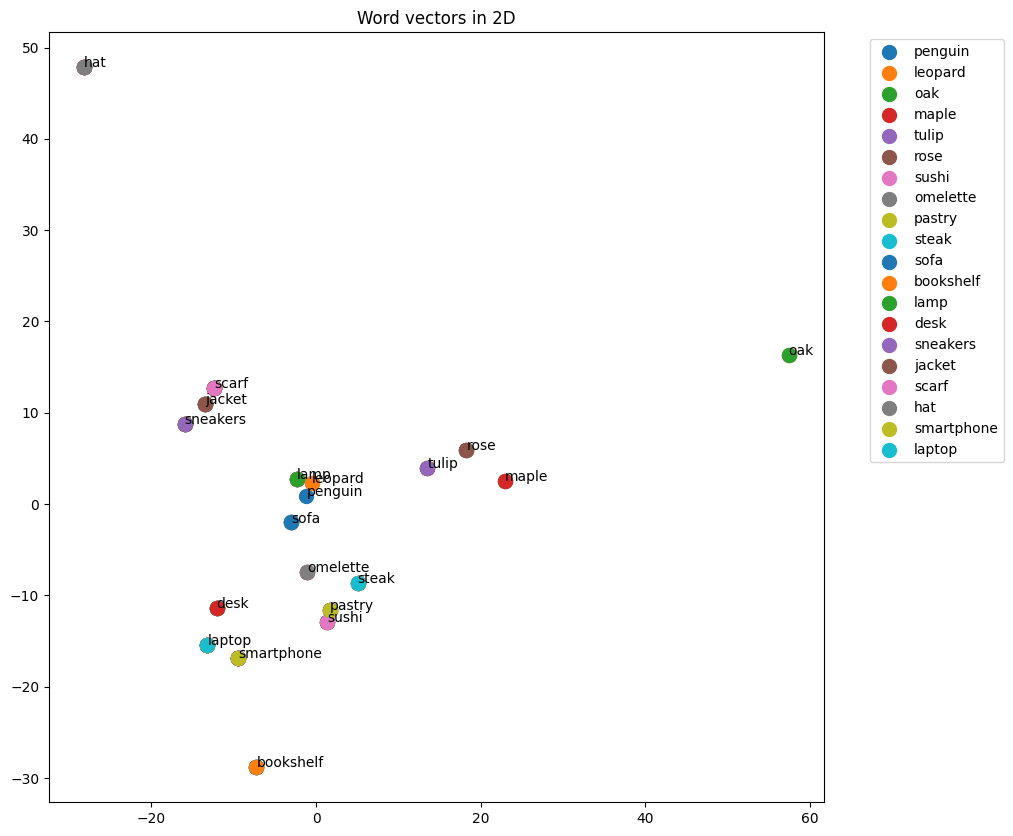

In [19]:
words = ["penguin", "leopard", "oak", "maple", "tulip", "rose",
         "sushi", "omelette", "pastry", "steak",
         "sofa", "bookshelf", "lamp", "desk",
         "sneakers", "jacket", "scarf", "hat",
         "smartphone", "laptop"]
words_vector = [word2vec(word).vector for word in words]


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(words_vector)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(principalComponents[i:, 0], principalComponents[i:, 1], s=100)
    plt.text(principalComponents[i, 0], principalComponents[i, 1], word)
    plt.legend(words, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Word vectors in 2D')
plt.show()


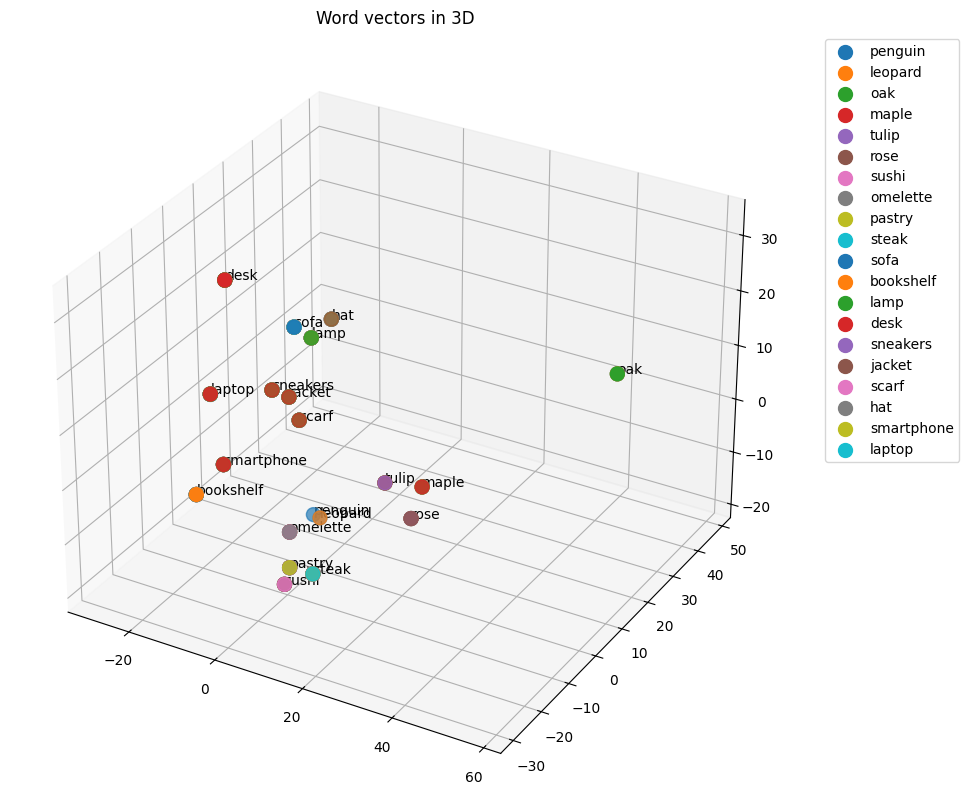

In [22]:
words = ["penguin", "leopard", "oak", "maple", "tulip", "rose",
         "sushi", "omelette", "pastry", "steak",
         "sofa", "bookshelf", "lamp", "desk",
         "sneakers", "jacket", "scarf", "hat",
         "smartphone", "laptop"]
words_vector = [word2vec(word).vector for word in words]


pca = PCA(n_components=3)
principalComponents = pca.fit_transform(words_vector)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(words)):
    ax.scatter(principalComponents[i:, 0], principalComponents[i:, 1], principalComponents[i:, 2], s=100)
    ax.text(principalComponents[i, 0], principalComponents[i, 1], principalComponents[i, 2], words[i])
    ax.legend(words, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_title('Word vectors in 3D')
plt.show()


In [18]:
round(2.3232, 2)

2.32

In [19]:
sentences = ["I purchased a science fiction book last week",
                "I loved this fragrance: light, floral and feminine",
                "I purchased a bottle of wine"] 
keyword = "perfume"
sentences_vector = [word2vec(sentence) for sentence in sentences]

similarity = [(round(word2vec(keyword).similarity(sentence), 2), sentence) for sentence in sentences_vector]
similarity.sort(reverse=True)
similarity

[(0.51, I loved this fragrance: light, floral and feminine),
 (0.43, I purchased a bottle of wine),
 (0.28, I purchased a science fiction book last week)]

In [20]:
import pandas as pd
amazon = pd.read_csv('amazon_alexa.tsv', sep='\t')
amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [56]:
list_reviews = amazon['verified_reviews'].tolist()
print(list_reviews[:5])

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music']


In [63]:
music = word2vec('music')
music_reviews = [word2vec(str(review)) for review in list_reviews]
similarity = [music.similarity(review) for review in music_reviews]

C:\Users\Joan\AppData\Local\Temp\ipykernel_4592\2733762873.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = [music.similarity(review) for review in music_reviews]


In [64]:

filtered_reviews = [review for review, similarity in zip(list_reviews, similarity) if float(similarity) > 0.5]
print(filtered_reviews[:5])

['Music', 'The sound is amazing and many collections of all music', 'Clear music', 'Listen music and set timer', 'Love the feature to play music in every room with multiple Echos.']


#### Results with Preprocess Reviews

In [21]:
from nltk.corpus import stopwords

stopwords_s = stopwords.words()
def preprocess(string):
    return " ".join(word.lower() 
     for word in str(string).split() if word not in stopwords_s)

In [22]:
# Clean the reviews
amazon['verfied_reviews_curated'] = amazon['verified_reviews'].apply(preprocess)
reviews_list = amazon['verfied_reviews_curated'].to_list()
review_originals = amazon['verified_reviews']
# Create the word embeddings
review_embeddings = [(word2vec(str(review)), review_original) for review, review_original in zip(reviews_list, review_originals)]
word_embeddings = word2vec("music")

In [23]:
similarities = [(round(word_embeddings.similarity(embedding), 2), review) 
                for embedding, review in review_embeddings]

C:\Users\34644\AppData\Local\Temp\ipykernel_10752\2300918319.py:1: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarities = [(round(word_embeddings.similarity(embedding), 2), review)


In [24]:
# Use filter to get the reviews with a similarity higher than the threshold
threshold = 0.5
similar_reviews = list(filter(lambda x: x[0] > threshold, similarities))
similar_reviews.sort(reverse = True)

In [26]:
similar_reviews[:10]

[(1.0, 'Music'),
 (0.8, 'Sound is terrible if u want good music too get a bose'),
 (0.8, 'Sound is terrible if u want good music too get a bose'),
 (0.8, 'Clear music'),
 (0.8, 'Clear music'),
 (0.78, 'Love the music the stories'),
 (0.77, 'Music mainly but still checking other features'),
 (0.74, 'The sound is amazing and many collections of all music'),
 (0.74, 'The sound is amazing and many collections of all music'),
 (0.67, 'Great product we listen to music all the time')]